# **Questão 1 (2 pontos)**


---



Colete 2 bases de dados diferentes na internet e utilize a biblioteca *pymfe* para extrair as metafeatures de cada uma, depois calcule a distância euclidiana de cada base e mostre quais são as mais próximas.



Dica: utilize sites como o openML e o kaggle para obter as bases de dados e olhe a documentação da biblioteca em https://pypi.org/project/pymfe/

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install -U pymfe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.7 MB/s eta 0:00:00


In [3]:
from sklearn.datasets import load_iris
from scipy.spatial.distance import pdist
from pymfe.mfe import MFE
import pandas as pd
import numpy as np

## Iris (sklearn)

In [4]:
data1 = load_iris()
y1 = data1.target
X1 = data1.data

In [ ]:
# Default measures
mfe1 = MFE()
mfe1.fit(X1, y1)

ft1 = mfe1.extract()

ft = list(map(list, zip(*ft1)))
pd.DataFrame(ft)

,0,1
0,attr_conc.mean,0.209805
1,attr_conc.sd,0.119588
2,attr_ent.mean,2.277191
3,attr_ent.sd,0.061039
4,attr_to_inst,0.026667
...,...,...
106,var_importance.mean,0.250000
107,var_importance.sd,0.448753
108,w_lambda,0.023439
109,worst_node.mean,0.600000


In [ ]:
# General, statistical and information-theoretic measures
mfe = MFE(groups=["general", "statistical", "info-theory"])
mfe.fit(X1, y1)

ft = mfe.extract()

ft = list(map(list, zip(*ft)))
pd.DataFrame(ft)

,0,1
0,attr_conc.mean,0.209805
1,attr_conc.sd,0.119588
2,attr_ent.mean,2.277191
3,attr_ent.sd,0.061039
4,attr_to_inst,0.026667
...,...,...
68,t_mean.mean,3.470556
69,t_mean.sd,1.904802
70,var.mean,1.143239
71,var.sd,1.332546


In [ ]:
# All measures
mfe = MFE(groups="all")
mfe.fit(X1, y1)

ft = mfe.extract()

ft = list(map(list, zip(*ft)))
pd.DataFrame(ft)

,0,1
0,attr_conc.mean,0.209805
1,attr_conc.sd,0.119588
2,attr_ent.mean,2.277191
3,attr_ent.sd,0.061039
4,attr_to_inst,0.026667
...,...,...
175,wg_dist.sd,0.056122
176,worst_node.mean,0.620000
177,worst_node.mean.relative,1.000000
178,worst_node.sd,0.070623


In [ ]:
# Distâncias euclidianas entre todas as observações dos dados
distances = pdist(X1, metric='euclidean')
distances

array([0.53851648, 0.50990195, 0.64807407, ..., 0.6164414 , 0.64031242,
       0.76811457])

## Breast Cancer Dataset

Disponível em https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

In [5]:
data2 = pd.read_csv("/content/breast-cancer.csv")
data2.drop(["id"], axis=1, inplace=True)
# M - maligno
# B - benigno
data2['diagnosis'].replace({'M': '1', 'B': '0'}, inplace=True) 
data2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
y2 = data2.diagnosis
X2 = data2[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
X2 = np.array(X2)       
y2 = np.array(y2)       

In [ ]:
# Default measures
mfe2 = MFE()
mfe2.fit(X2, y2)

ft2 = mfe2.extract()

ft = list(map(list, zip(*ft2)))
ft = pd.DataFrame(ft)
ft

,0,1
0,attr_conc.mean,0.092414
1,attr_conc.sd,0.171368
2,attr_ent.mean,2.999956
3,attr_ent.sd,0.000049
4,attr_to_inst,0.052724
...,...,...
106,var_importance.mean,0.033333
107,var_importance.sd,0.127025
108,w_lambda,0.225675
109,worst_node.mean,0.887594


In [ ]:
# General, statistical and information-theoretic measures
mfe = MFE(groups=["general", "statistical", "info-theory"])
mfe.fit(X2, y2)

ft = mfe.extract()

ft = list(map(list, zip(*ft)))
pd.DataFrame(ft)

,0,1
0,attr_conc.mean,0.085521
1,attr_conc.sd,0.125049
2,attr_ent.mean,2.999956
3,attr_ent.sd,0.000049
4,attr_to_inst,0.052724
...,...,...
68,t_mean.mean,53.294606
69,t_mean.sd,165.816892
70,var.mean,15063.218542
71,var.sd,62593.546961


In [ ]:
# All measures
mfe = MFE(groups="all")
mfe.fit(X2, y2)

ft = mfe.extract()

# ft = list(map(list, zip(*ft)))
# pd.DataFrame(ft)

In [ ]:
# Distâncias euclidianas entre todas as observações dos dados
distances = pdist(X2, metric='euclidean')
distances

array([ 341.73026209,  376.45576488, 1584.31401669, ...,  810.71408767,
       1095.19034482, 1901.1259166 ])

## Distância Euclidiana entre base de dados

Iremos considerar as features calculadas por padrão pela pymfe

In [15]:
mfe = MFE()

mfe.fit(X1,y1)
mf1 = mfe.extract()

mfe.fit(X2,y2)
mf2 = mfe.extract()

In [18]:
from sklearn.metrics.pairwise import euclidean_distances

mf1 = np.array(mf1[1])
mf1 = np.nan_to_num(mf1, nan=0)
mf2 = np.array(mf2[1])
mf2 = np.nan_to_num(mf2, nan=0)

distances = euclidean_distances(mf1.reshape(-1, 1), mf2.reshape(-1, 1))

print(distances)

[[0.01116822]]


# **Questão 2 (0,5 ponto)**



---


Qual a importância de usar as metafeatures para obter informações das bases de dados durante o processo de recomendação de algoritmos?

As *metafeatures* são medidas de características das bases de dados que podem ser usadas para entender suas propriedades e ajudar a escolher quais algoritmos de *machine learning* serão mais eficazes para a tarefa em questão. O uso de *metafeatures* no processo de recomendação de algoritmos tem várias vantagens, incluindo a ajuda na escolha do algoritmo adequado, a redução do custo computacional, o aumento da eficiência do processo de análise de dados e a facilitação da interpretação dos resultados. 

# **Questão 3 (0,5 ponto)**



---



Explique como o SVM utiliza o Kernel Trick.

 Kernel Trick é uma técnica utilizada pelo SVM para transformar os dados de entrada em um espaço de alta dimensionalidade, permitindo que ele trabalhe com dados que não são linearmente separáveis. Isso é feito usando uma função Kernel que calcula o produto escalar entre pares de vetores no novo espaço de alta dimensionalidade, permitindo que o SVM trabalhe com dados em espaços de dimensões muito elevadas sem aumentar a complexidade computacional.

# **Questão 4 (0,5 ponto)**


---



Como os hiperparâmetros C, Gamma e Kernel influenciam no funcionamento e interpretação do SVM ?

O SVM é altamente dependente dos hiperparâmetros para seu desempenho e interpretação, sendo o C, o Gamma e o tipo de Kernel os mais importantes. O hiperparâmetro C controla a flexibilidade do modelo e a capacidade de generalização, enquanto Gamma controla a suavidade da fronteira de decisão e o tipo de Kernel determina a forma da fronteira de decisão. A escolha correta desses hiperparâmetros é essencial para obter um modelo preciso e bem generalizado, enquanto a escolha inadequada pode levar a um modelo menos preciso e sujeito a overfitting.

# **Questão 5 (1,5 ponto)**


---



Escolha uma base de dados de classificação de sua preferência e utilize o método Grid Search para encontrar os melhores hiperparametros do SVM para a base de dados.

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [4]:
# hiperparâmetros testados
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'sigmoid']}

In [9]:
svm = SVC()

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", grid_search.best_params_)
print()

best_svm = grid_search.best_estimator_
print(f"Acurácia do modelo: {best_svm.score(X_test, y_test)*100}%")

Melhores parâmetros encontrados: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

Acurácia do modelo: 100.0%


# **Questão 6 (1 ponto)**


---

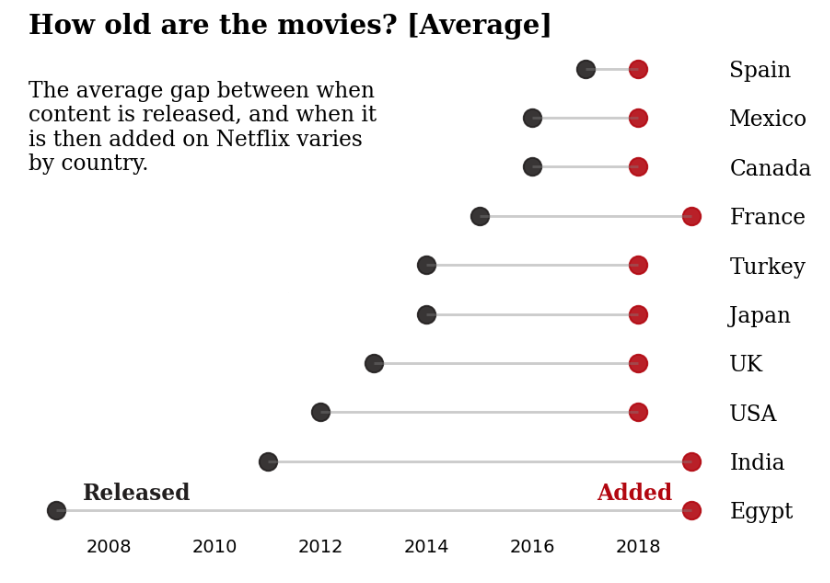


Tendo como base a imagem acima, essa é uma boa representação desse tipo de dado? Descreva como essa forma de visualização de dados pode ser comparada com um gráfico semelhante de barras.

(Obs: Os valores utilizados das coordenadas são do valor médio de ano de lançamento e ano de adição à Netflix.)

---

**Base de dados e gráficos utilizados:** [Netflix Data Visualization](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization/notebook)


A imagem acima não faz uma boa representação dos dados, visto que perdemos algumas informações sobre a diferença média entre a data de lançamento de um conteúdo e a data em que ele é adicionado ao catálogo do Netflix. ALém disso, na imagem é difícil fazer a comparação dos países que possui uma diferença de data de lançamento menor.

Utilizando um gráfico de barras, cada país seria representado por uma barra, cuja altura representaria a diferença média para esse país. Isso permitiria visualizar as diferenças entre os países de forma clara e comparativa, além de facilitar a comparação entre países com diferenças menores.

# **Questão 7 (0,5 ponto)**


---

A partir da questão anterior, quais conclusões podemos tirar a partir de uma análise desse gráfico?

A análise de um gráfico pode fornecer informações valiosas sobre o conjunto de dados representado, incluindo a tendência, variação, presença de outliers, padrões e relações entre as variáveis. As informações extraídas dependem do tipo de gráfico utilizado, bem como da distribuição e comportamento dos dados analisados. Portanto, é importante selecionar o tipo de gráfico mais apropriado para representar as informações de forma clara e significativa.

# **Questão 8 (1,5 ponto)**


---



Elabore um Diagrama de Pareto com a base `videogame_sales.csv`.

Utilize 2 colunas desejadas entre `Developer`, `Rating`, `Publisher` e `Genre` com os valores desejados e faça uma avaliação a partir do seu diagrama gerado.

Por exemplo, avalie a coluna `Developer` a partir do `Rating == E`.

**Obs: recomendado utilizar só uma pequena porção dos dados. Como no exemplo acima, utilizar somente os 10 `Developers` mais frequentes na base com `Rating == E` ao invés de todos.**

**Para mais informações sobre como esse diagrama funciona, aqui vão alguns lins:**

* [Diagrama de Pareto](https://ferramentasdaqualidade.org/diagrama-de-pareto/)
* [Gestão de processos - O que é um Diagrama de Pareto? [Com exemplos]](https://blog.zeev.it/diagrama-de-pareto/)
* [Diagrama de Pareto - Wikipédia](https://pt.wikipedia.org/wiki/Diagrama_de_Pareto)

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv("/content/videogame_sales.csv")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
def pareto_plot(data, column, title=None, xlabel=None, ylabel=None):

    # Conta a frequência de cada categoria na coluna especificada
    count = data[column].value_counts()

    # frequência relativa de cada categoria
    freq_rel = count / count.sum()

    # Ordena as categorias em ordem decrescente de frequência
    freq_rel_sorted = freq_rel.sort_values(ascending=False)

    # Calcula a frequência acumulada de cada categoria
    freq_acum = freq_rel_sorted.cumsum()

    # Cria um DataFrame com as frequências relativas e acumuladas de cada categoria
    pareto_data = pd.DataFrame({'freq_rel': freq_rel_sorted,
                                'freq_acum': freq_acum})

    # Cria um gráfico de barras para as frequências relativas
    fig, ax1 = plt.subplots(figsize=(16,9))
    ax1.bar(pareto_data.index, pareto_data['freq_rel'], color='tab:blue')
    ax1.set_xlabel(xlabel or column)
    ax1.set_ylabel(ylabel or 'Frequência Relativa')

    # Adiciona uma linha com a frequência acumulada no eixo secundário
    ax2 = ax1.twinx()
    ax2.plot(pareto_data.index, pareto_data['freq_acum'], color='tab:red', marker='o')
    ax2.set_ylabel('Frequência Acumulada')

    plt.title(title or f'Gráfico de Pareto para {column}')

    # Rotaciona as etiquetas do eixo X para evitar sobreposição
    plt.xticks(rotation=45, ha='right')
    plt.show()

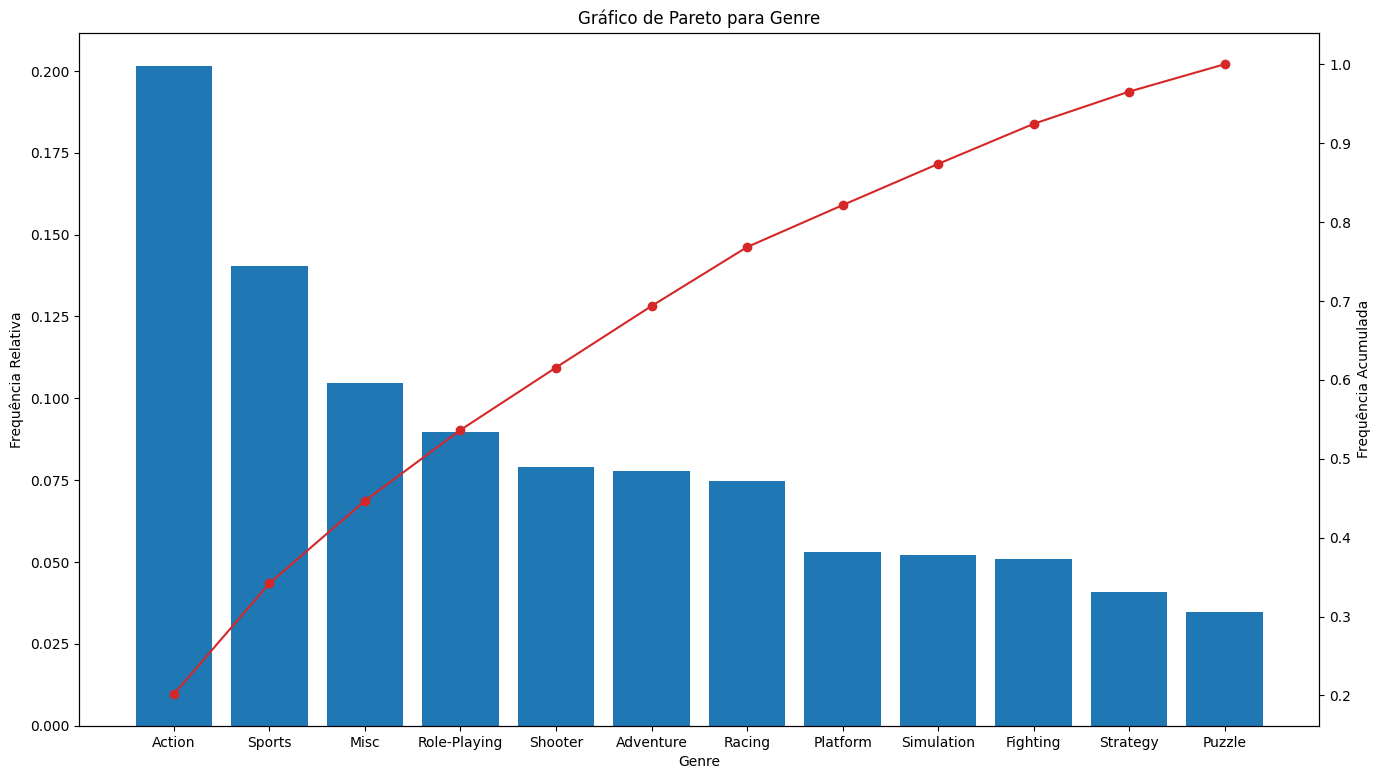

In [41]:
pareto_plot(df, "Genre")

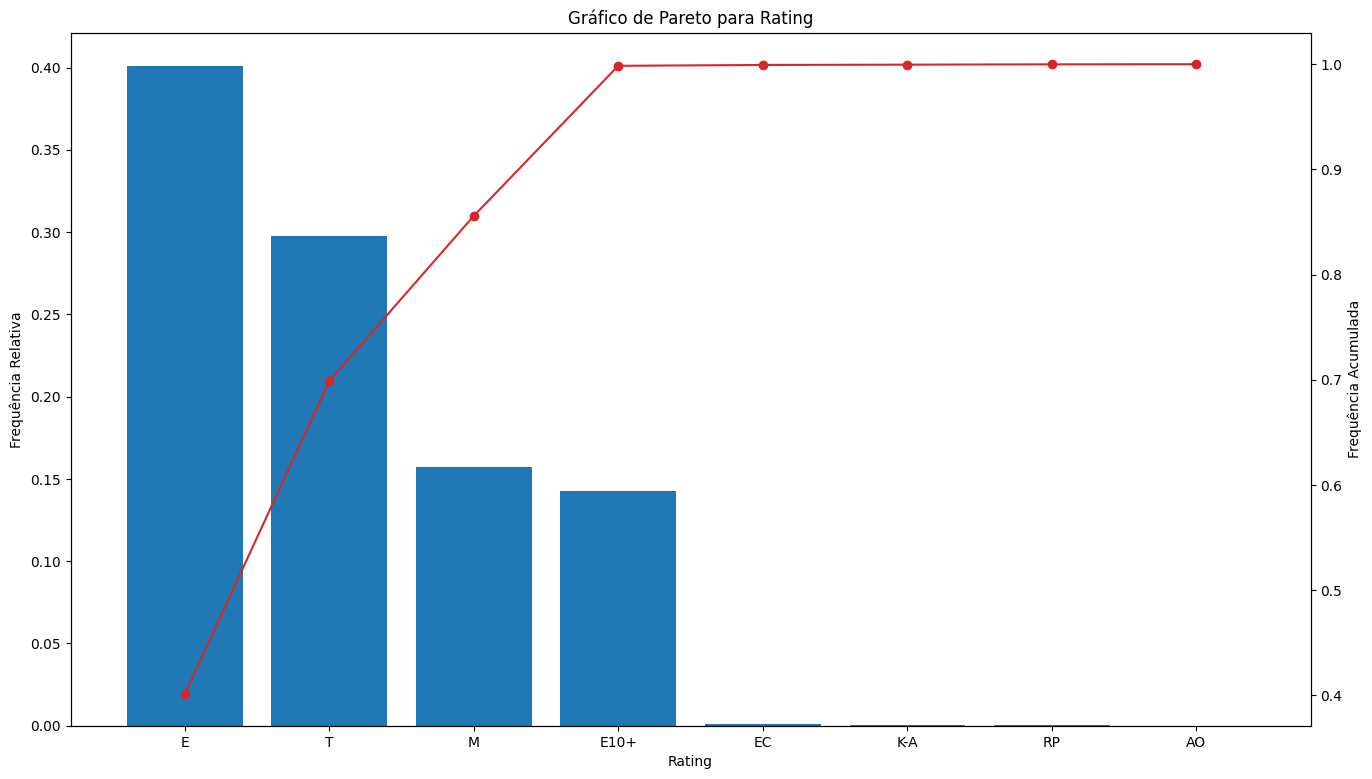

In [42]:
pareto_plot(df, "Rating")

# **Questão 9 (2 pontos)**


---


Usando a base de dados `sales_ts.csv`, quais conclusões podem ter tiradas de uma avaliação desses dados? Qual a sua tendência e sazonalidade?

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
df = pd.read_csv("/content/sales_ts.csv")
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [60]:
def plot_line_graph(dataframe, x_column, y_column):
    dataframe[x_column] = pd.to_datetime(dataframe[x_column], format='%d.%m.%Y')
    dataframe = dataframe.sort_values(by=[x_column])

    plt.figure(figsize=(10, 5))

    plt.plot(dataframe[x_column], dataframe[y_column])

    plt.title(f'Variação no tempo: {y_column}')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.show()


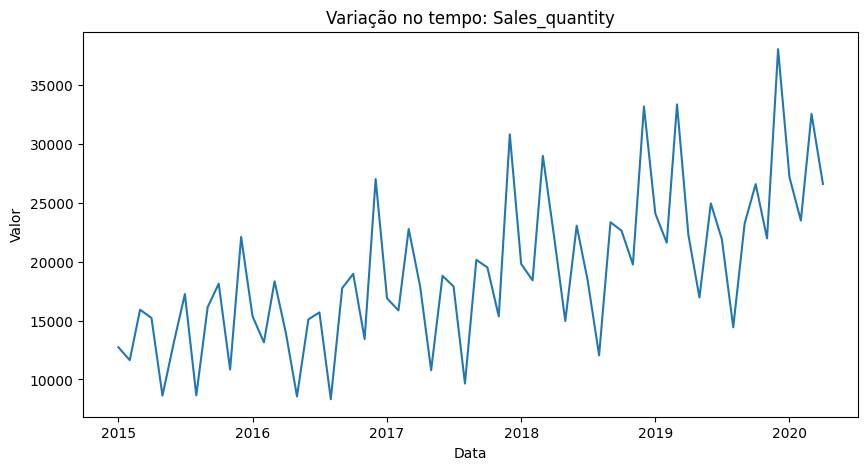

In [56]:
plot_line_graph(df, "Period", "Sales_quantity")

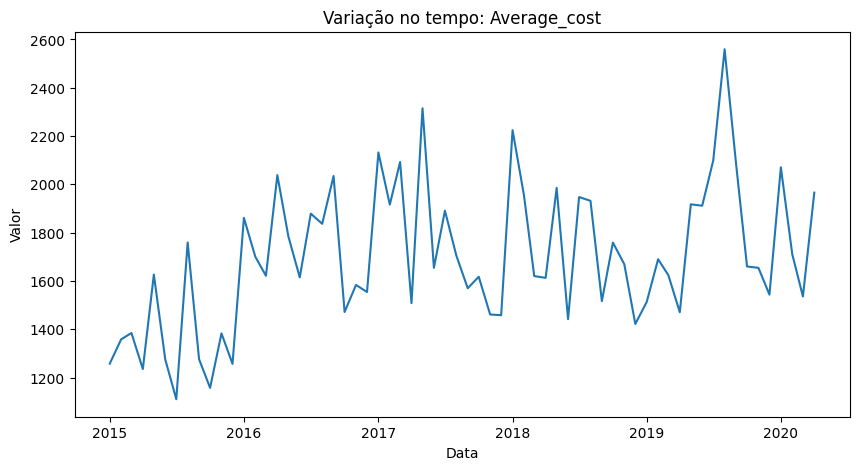

In [57]:
plot_line_graph(df, "Period", "Average_cost")

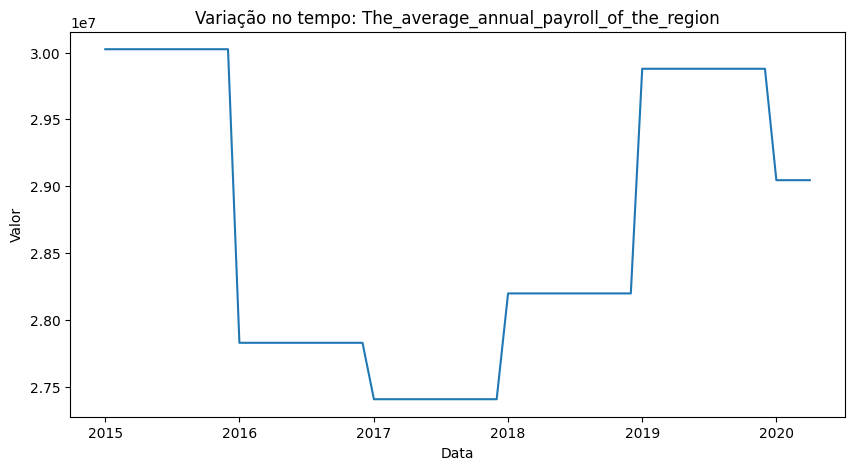

In [58]:
plot_line_graph(df, "Period", "The_average_annual_payroll_of_the_region")

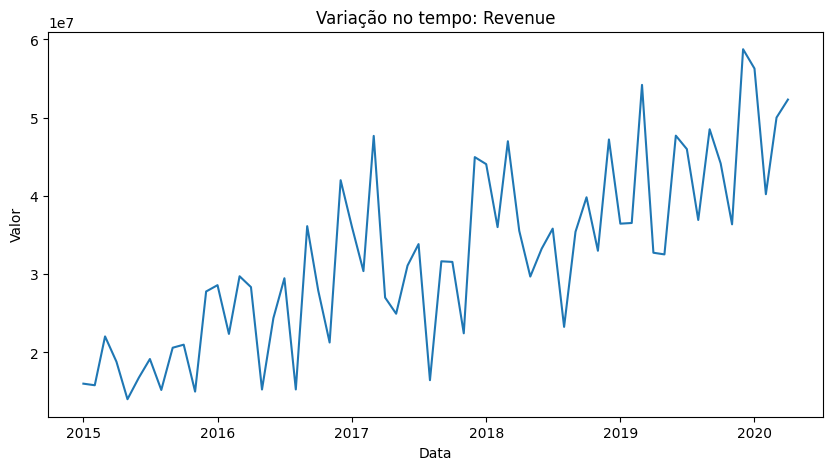

In [59]:
plot_line_graph(df, "Period", "Revenue")

*   **Sales_quantity**: apresenta  tendência linear e a sazonalidade aditiva;
*   **Average_cost**: não apresenta tendência, porém possui sazonalidade;
*   **The_average_annual_payroll_of_the_region**: não apresenta tendência e nem sazonalidade;
*   **Revenue**: apresenta  tendência linear e a sazonalidade aditiva;



Dado o comportamento das variáveis do conjunto de dados, podemos tomar as seguintes conclusões:

*   As vendas têm uma tendência positiva ao longo do tempo, o que pode indicar que o negócio está crescendo;
*   O custo médio não apresenta uma tendência clara, mas parece haver uma sazonalidade no custo, o que pode indicar variações nos preços dos insumos ao longo do ano;
*   O valor médio de folha de pagamento da região não apresenta uma tendência ou sazonalidade clara, o que pode indicar uma estabilidade na economia local;
*   A receita tem uma tendência positiva ao longo do tempo, acompanhando o crescimento das vendas, e também apresenta sazonalidade aditiva, o que pode indicar que as vendas são mais fortes em determinados períodos do ano.